# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
from typing import Tuple
import numpy as np

class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        
        y_pred = np.dot(X, w)
        mse = np.mean((y_pred - y) ** 2)
        return mse

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        y_pred = np.dot(X, w)
        grad = 2 / n_objects * np.dot(X.T, y_pred - y)
        return grad


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    w = w_init.copy() 
    w_list = [w.copy()]
    for i in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        w_list.append(w)
    return w_list
        
        
        
        

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [48]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, name_lr, name_batch = 'whole', p = 'none'):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title(f"Trajectory, lr: {name_lr}, batch: {name_batch}, p: {p}")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

In [9]:
#gradient_descent(w_init, X, y, loss, 0.01, 100000), X, y, loss

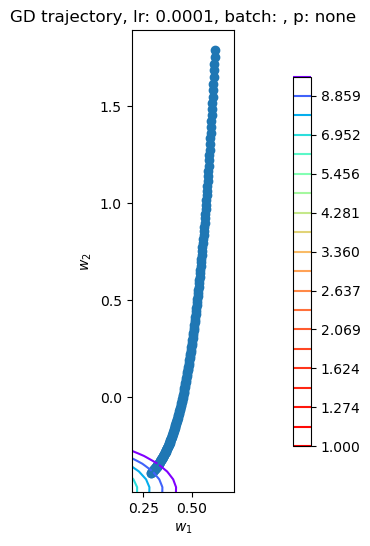

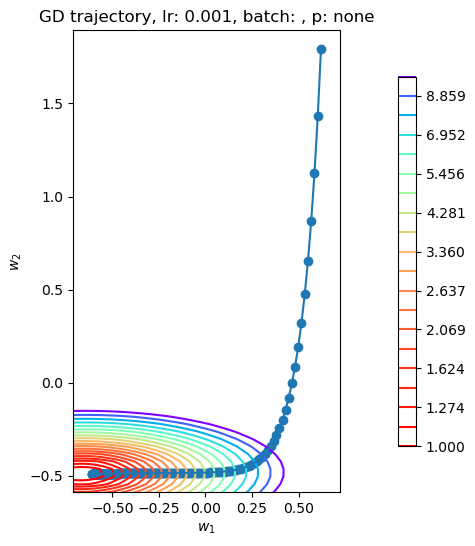

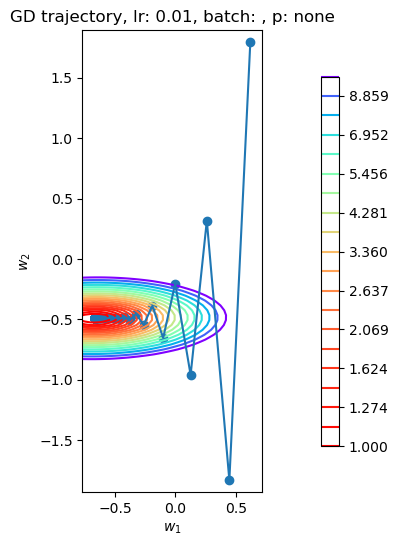

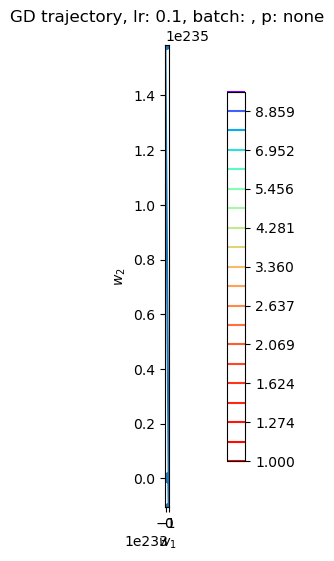

In [10]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 200), X, y, loss, lr, '')

Выводы:

1. При маленьких значениях шага градиентный спуск не доходит до значения true. Значит, нужно либо увеличивать шаг, либо количество итераций, что более ресурсозатратно.
2. При значении шага равном 0.001 удалось достичь целевого значения MSE, при этом график был плавным.
3. При значении шага 0.01 мы также достигли целевого значения, однако график оказался скачкообразным.
4. При значениях выше 0.01 градиентный спуск "перескакивает" целевое значение, что означает, что шаг в данном случае слишком велик.

# Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    w = w_init.copy()  
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w = w - lr * loss.calc_grad(batch, y[batch_indices], w)
        w_list.append(w)
    return w_list

    

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

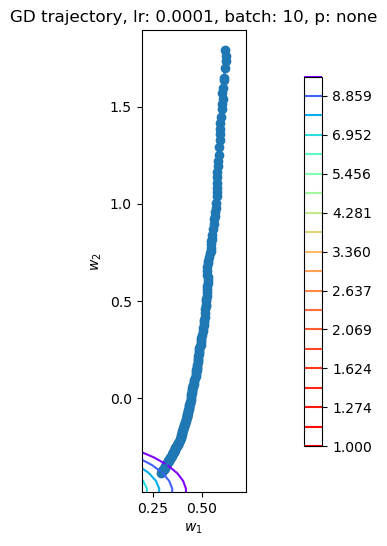

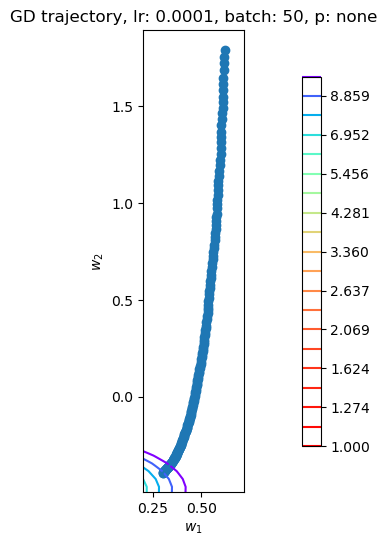

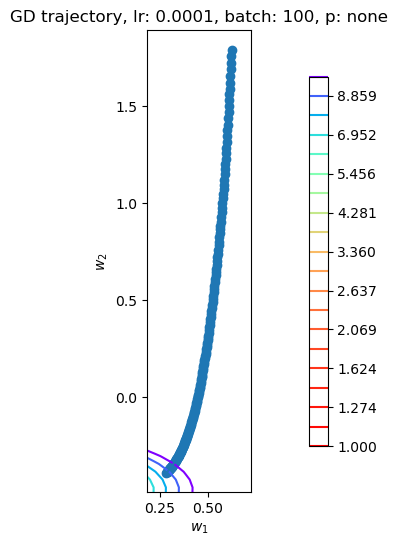

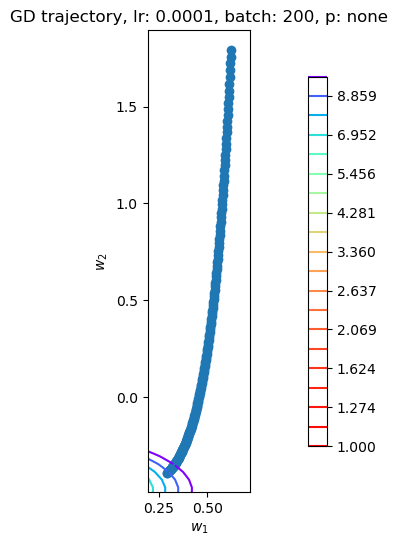

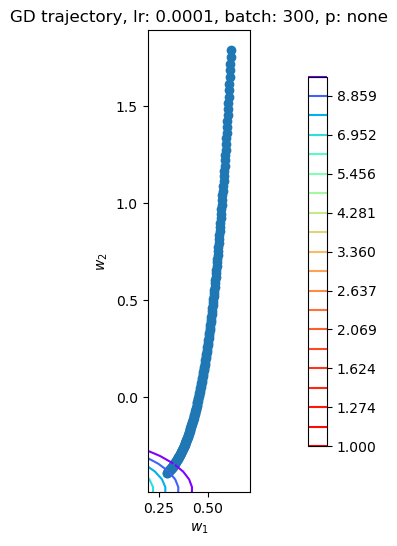

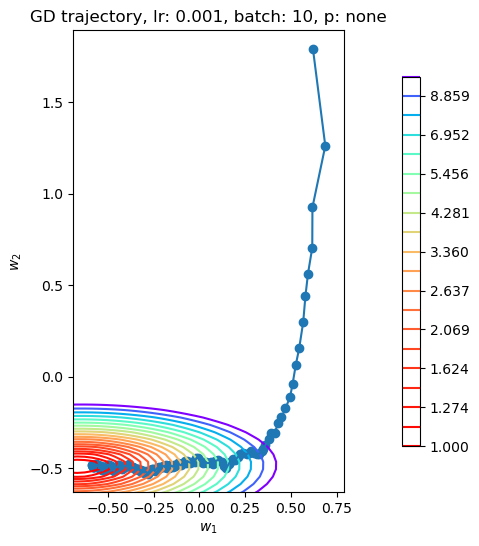

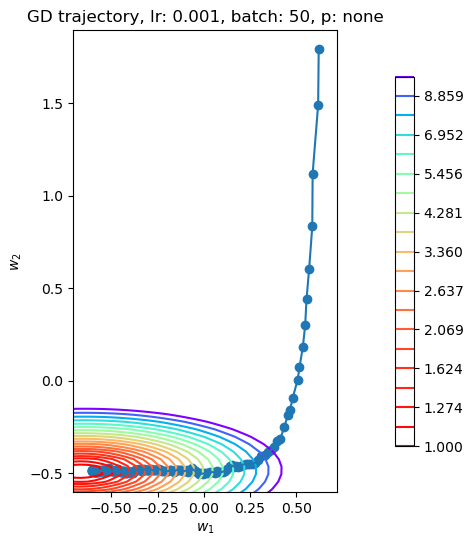

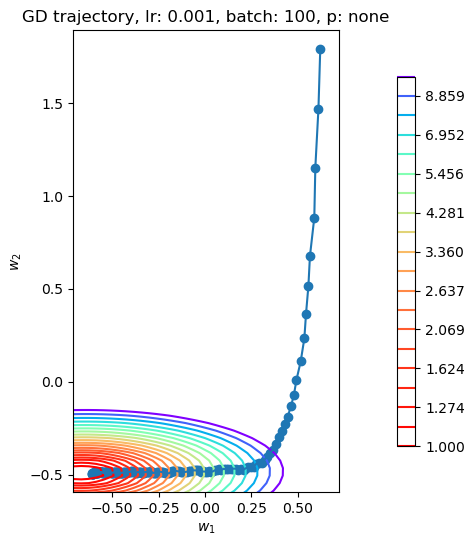

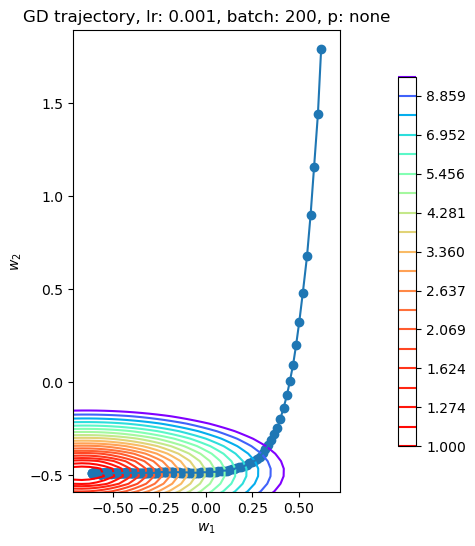

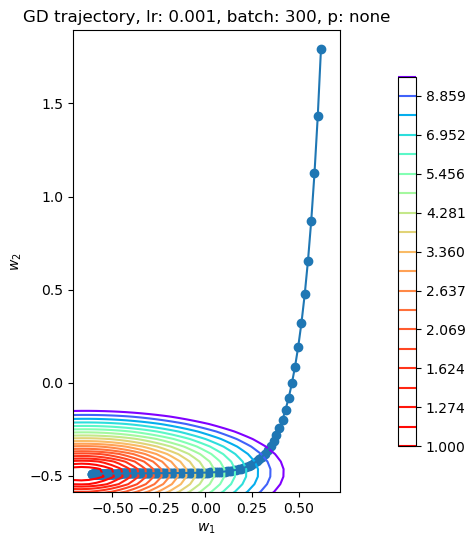

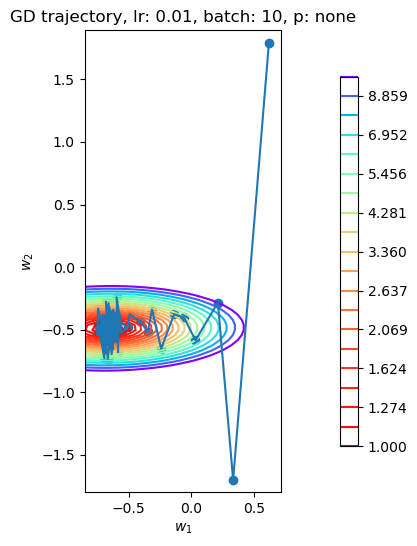

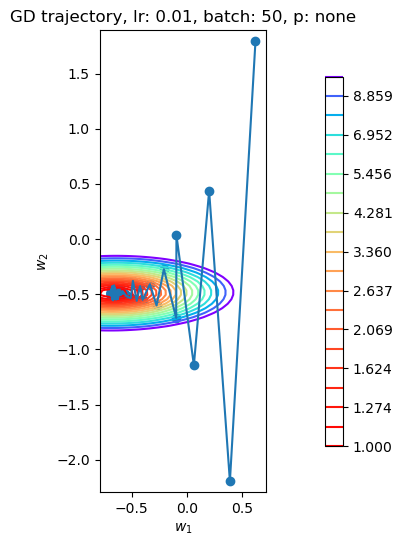

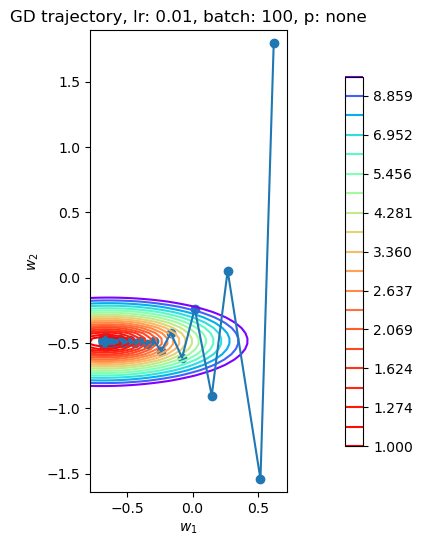

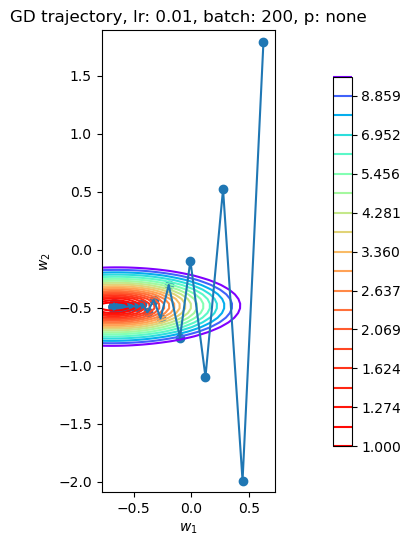

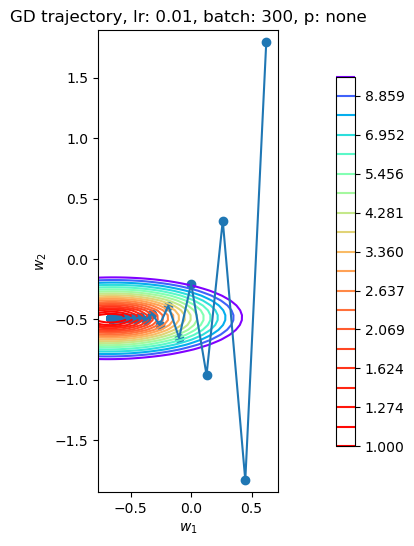

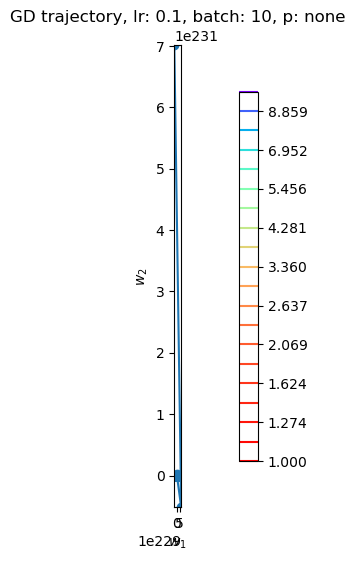

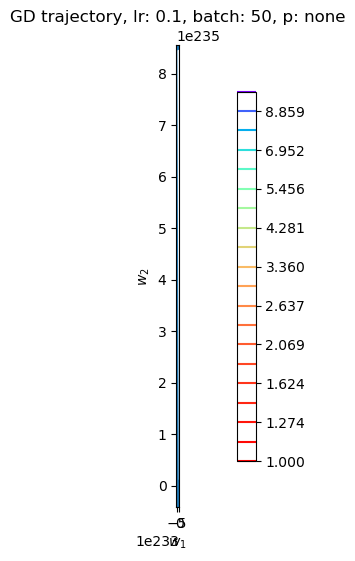

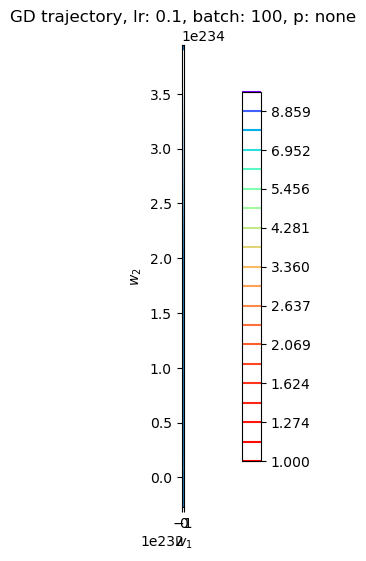

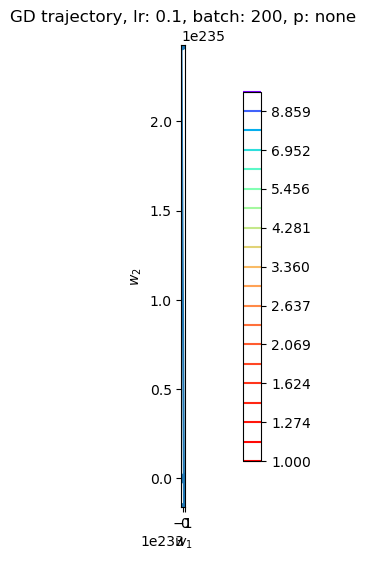

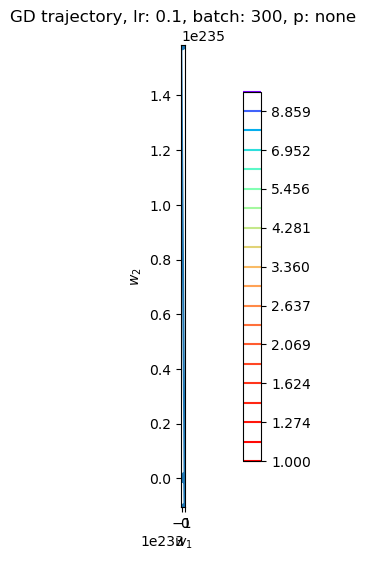

In [12]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    for batch in [10, 50, 100, 200, 300]:
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch, 200), X, y, loss, lr, batch)
    

Выводы:

1. Аналогично полному градиентному спуску, чем меньше шаг, тем график градиентного спуска более плавный
2. На гладкость линии графика также начинает влиять размер батча: чем выше батч, тем "точнее" градиентный спуск попадает в зону true. На маленьких батчах заметно, как график скачет вокруг центра, что объясн тем, что для разных маленьких батчей центр не совпадает с центром (искомым уровнем MSE) всей выборки.

Таким образом, исключая сам факт наличия батча и влияния его размера, явное отличие заключается вот в чем: даже при очень малых значениях длины шага график градиентного спуска необязательно будет плавным, так как это зависит также и от размера батча.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()  
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        lr = lr * (1/(1+i))**p
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w = w - lr * loss.calc_grad(batch, y[batch_indices], w)
        w_list.append(w)
    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

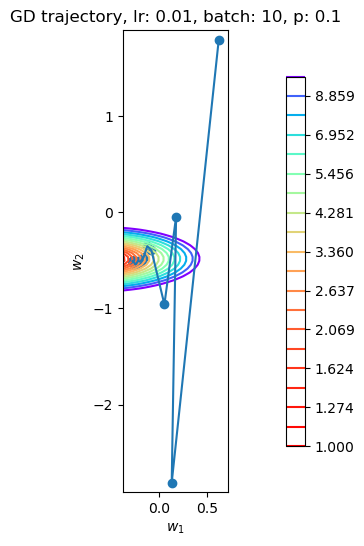

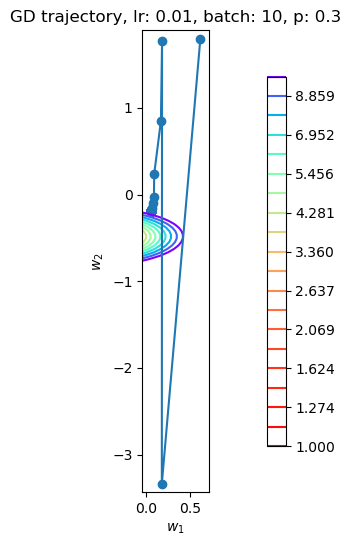

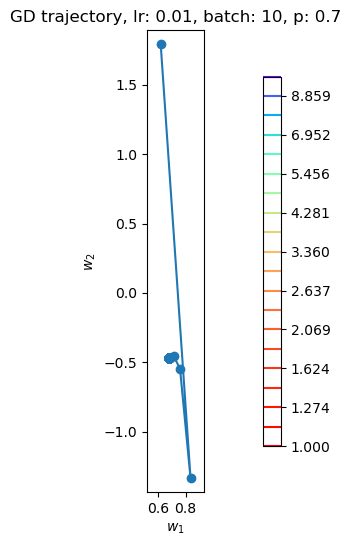

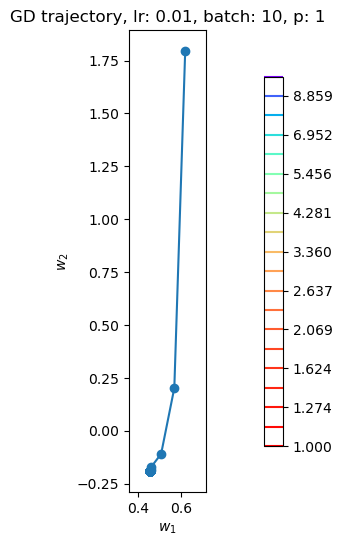

In [14]:
for p in [0.1, 0.3, 0.7, 1]:
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 10000), X, y, loss, 0.01, 10, p)

Выводы:

1. Судя по графикам, ни при одном из выбранных значений гиперпараметра p, градиентный спуск не сходится. Надо брать p поменьше или количество шагов еще больше.

2. Чем выше p, тем выше чувствительность длины шага к номеру шага. Графически это выражается тем, что тем выше р, тем быстрее градиентный спуск визуально застревает на месте, просто за счет того, что расстояние между шагами становится очень маленьким.    
Кроме того, это выражается в том, что чем ближе градиентный спуск подступает к области true, тем плавнее становится траектория. Можно сделать вывод, что при прочих равных, градиентный спуск с динамической длиной шага оптимальнее, за счет того, что удается избежать те самые скачки вокруг центра.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

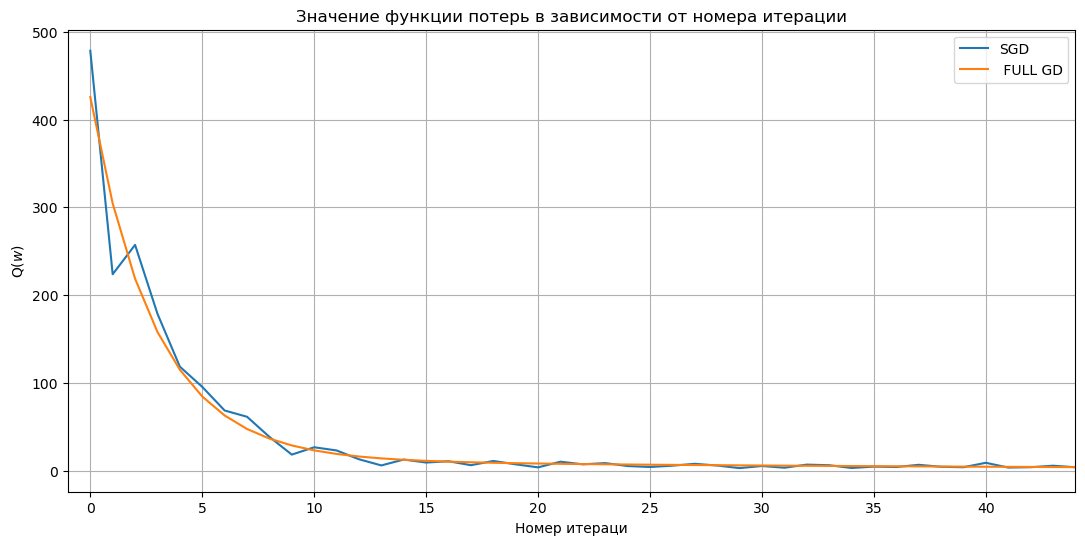

In [15]:
residuals_sgd = []
w = w_init.copy()  
batch_indices = np.random.choice(X.shape[0], size=10, replace=False)
batch = X[batch_indices]
residuals_sgd.append(loss.calc_loss(batch, y[batch_indices], w)) 
for i in range(2000):
    batch_indices = np.random.choice(X.shape[0], size=10, replace=False)
    batch = X[batch_indices]
    w = w - 0.001 * loss.calc_grad(batch, y[batch_indices], w)
    mse_loss = loss.calc_loss(batch, y[batch_indices], w)
    residuals_sgd.append(mse_loss)
    

    
residuals_gd = []
w = w_init.copy()  
residuals_gd.append(loss.calc_loss(X, y, w)) 
for i in range(2000):
    w = w - 0.001 * loss.calc_grad(X, y, w)
    mse_loss = loss.calc_loss(X, y, w)
    residuals_gd.append(mse_loss)


plt.figure(figsize=(13, 6))
plt.plot(range(2000+1), residuals_sgd, label="SGD")
plt.plot(range(2000+1), residuals_gd, label=" FULL GD")
#plt.plot(range(num_steps + 1), residuals_sgd, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel("Номер итераци")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()

Выводы:
1. Приближаются к нулю обе версии с примерно равной скоростью.
2. Однако, особенно на первых шагах, стохастистический градиентный спуск нестабилен. Он то оказывается выше значения МSE для полного ГС, то ниже. Как я понимаю, вывод можно сделать такой: быстрее ли СГД сойдется, чем ГД, или нет, зависит от случая. Скачки могут пойти как на пользу, так и во вред. 

В данном случае преимущество СГД заключается в том, что он смог достичь околонулевого значения MSE быстрее полного градиентного спуска.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr
        self.w = None  

    def fit(self, X: np.ndarray, y: np.ndarray, n_iterations: int = 1000) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.zeros(X.shape[1])
        
        w_list = self.gradient_descent(X, y, w_init, n_iterations)

        self.w = w_list[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        y_pred = np.dot(X, self.w)

        return y_pred

    def gradient_descent(self, X: np.ndarray, y: np.ndarray, w_init: np.ndarray, n_iterations: int) -> List[np.ndarray]:
        w = w_init.copy() 
        w_list = [w.copy()]
        for i in range(n_iterations):
            w = w - self.lr * self.loss.calc_grad(X, y, w)
            w_list.append(w)
        return w_list


Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [18]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.columns = X_raw.columns.astype(str)
X_raw.head()
X_raw = X_raw[~X_raw['25'].isna()].reset_index()

In [19]:
y = X_raw['25']
X_raw = X_raw.drop('25', axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [20]:
from sklearn.impute import SimpleImputer


cat_features_mask = (X_raw.dtypes == "object").values


X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_real), columns=X_real.columns
)

X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.head()

,index,0,1,9,10,11,12,13,16,18,...,2,3,4,5,6,7,8,14,15,17
0,0.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,2.0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,3.0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,4.0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [21]:
print(f"Shape before encoding: {X_no_mis.shape}")
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
X_dum

Shape before encoding: (201, 26)


,index,0,1,9,10,11,12,13,16,18,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,False,False,False,False,False,False,False,True,False,False
1,1.0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,...,False,False,False,False,False,False,False,True,False,False
2,2.0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,...,False,False,False,False,False,False,False,True,False,False
3,3.0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,...,False,False,False,False,False,False,False,True,False,False
4,4.0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200.0,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,...,False,False,False,False,False,False,False,True,False,False
197,201.0,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,...,False,False,False,False,False,False,False,True,False,False
198,202.0,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,...,False,False,False,False,False,False,False,True,False,False
199,203.0,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,...,False,False,False,False,False,True,False,False,False,False


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=10)


In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [25]:
regression = LinearRegression(MSELoss(), lr=0.01)


regression.fit(X_train, y_train)


**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = regression.predict(X_train)

y_pred_test = regression.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred)

mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error on Train set:", mse_train)
print("Mean Squared Error on Test set:", mse_test)


Mean Squared Error on Train set: 2328822.1719814776
Mean Squared Error on Test set: 5700535.0947093405


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [27]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        y_pred = np.dot(X, w)
        mse = np.mean((y_pred - y) ** 2)
        reg_term = self.coef * np.sum(w[:-1] ** 2)  
        return mse + reg_term

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        y_pred = np.dot(X, w)
        grad_mse = 2 / n_objects * np.dot(X.T, y_pred - y)
        grad_reg = 2 * self.coef * np.append(w[:-1], 0)  
        return grad_mse + grad_reg


Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [28]:
regression_2 = LinearRegression(MSEL2Loss(coef=0.14), lr=0.01)


regression_2.fit(X_train, y_train)

y_pred = regression_2.predict(X_train)

y_pred_test = regression_2.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred)

mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error on Train set:", mse_train)
print("Mean Squared Error on Test set:", mse_test)

Mean Squared Error on Train set: 3290462.0864796336
Mean Squared Error on Test set: 4149627.0343896756


Выводы:
1. Результаты МSE на тестовой выборке уменьшились примерно на 27 %. Это означает, что используя L2 регулязирацию, удалось существенно повысить качество модели.
2. На тренировочной выборке ошибке также существенно возросла, что лишь подтверждает, что регуляризация сработала.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [29]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        y_pred = np.dot(X, w)
        diff = y_pred - y
        abs_diff = np.abs(diff)
        loss = np.where(abs_diff <= self.eps, 0.5 * diff ** 2, self.eps * (abs_diff - 0.5 * self.eps))
        return np.mean(loss)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        y_pred = np.dot(X, w)
        diff = y_pred - y
        abs_diff = np.abs(diff)
        grad = np.where(abs_diff <= self.eps, diff, self.eps * np.sign(diff))
        grad = np.dot(X.T, grad) / n_objects
        return grad


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [30]:
regression_hb = LinearRegression(HuberLoss(eps=4000), lr=0.01)


regression_hb.fit(X_train, y_train)

y_pred = regression_hb.predict(X_train)

y_pred_test = regression_hb.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred)

mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error on Train set:", mse_train)
print("Mean Squared Error on Test set:", mse_test)

Mean Squared Error on Train set: 3369335.3156256974
Mean Squared Error on Test set: 3754310.412224432


Выводы:

Удалось существенно повысить качество модели, о чем свидтельствует снижение MSE на тестовой выборке приблизительно на 34%. В данном случае HuberLoss сработало лучше, чем L2 регуляризация. Видимо, данные содержат немало сильных аномалий, которые снижают качество модели без использования HuberLoss.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2024 в ячейку ниже:

https://www.youtube.com/watch?v=HHA1cPctV-4

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [42]:
class LinearRegressionSa:
    def __init__(self, loss, lr=0.01):
        self.loss = loss
        self.lr = lr

    def fit_simulated_annealing(self, X, y, initial_w, max_iterations, initial_temperature, cr):
        current_w = initial_w
        current_cost = self.loss.calc_loss(X, y, current_w)

        best_w = current_w
        best_cost = current_cost

        temperature = initial_temperature

        w_list = [current_w.copy()]  

        for i in range(max_iterations):
            new_w = current_w + np.random.standard_t(3, size=current_w.shape)
            new_cost = self.loss.calc_loss(X, y, new_w)
            cost_difference = new_cost - current_cost

            if cost_difference < 0 or np.random.rand() < np.exp(-cost_difference / temperature):
                current_w = new_w
                current_cost = new_cost

            if current_cost < best_cost:
                best_w = current_w
                best_cost = current_cost

            temperature *= cr

            w_list.append(current_w.copy())  

        return best_w, best_cost, np.array(w_list)


In [43]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

linear_regression_sa = LinearRegressionSa(loss=MSELoss())


sa_w, sa_loss, sa_list = linear_regression_sa.fit_simulated_annealing(X, y, w_init, max_iterations=1000, initial_temperature=200, cr=0.5)


print("Simulated Annealing Loss:", sa_loss)



Simulated Annealing Loss: 0.9375537353197191


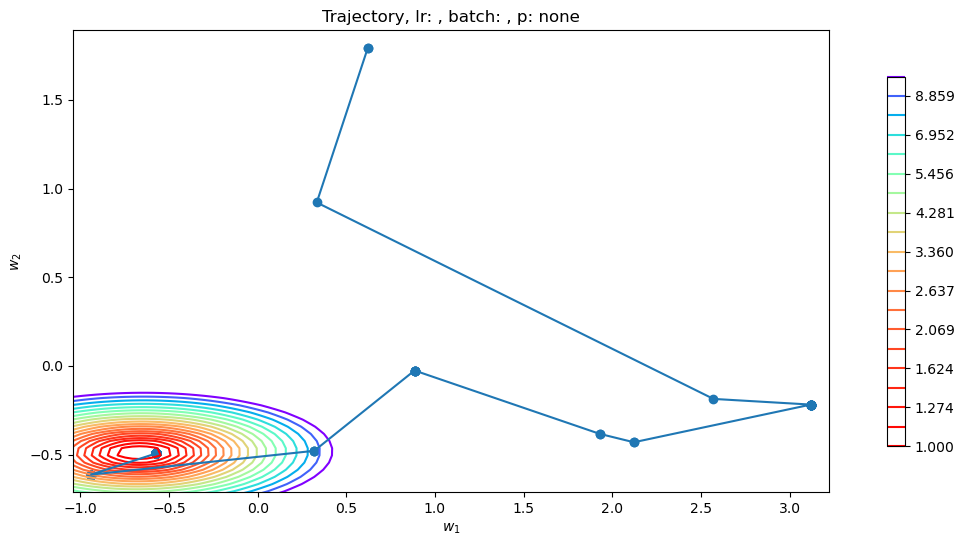

In [50]:
plot_gd(sa_list, X, y, loss, '', '')

In [53]:
w_list = gradient_descent(w_init, X, y, loss=MSELoss(), lr=0.01, n_iterations=1000)

final_w = w_list[-1]

final_loss = MSELoss().calc_loss(X, y, final_w)

print("Final GD Loss:", final_loss)

Final GD Loss: 0.8670644395649091


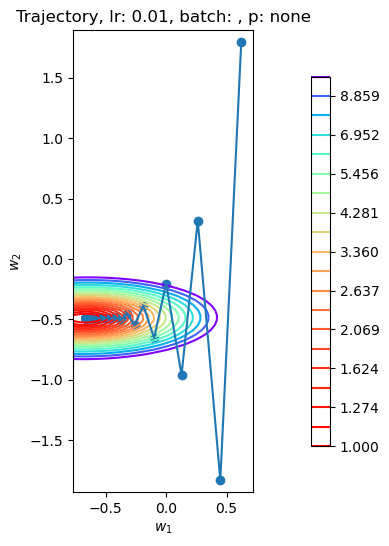

In [54]:
plot_gd(w_list, X, y, loss, 0.01, '')

Выводы:
1. У градиентного спуска оказался лучше MSE. Возможно, следовало бы подольше понастраивать параметры отжига, и тогда бы удалось достичь лучших результатов. В идеале нужна валидационная выборка.
2. Траектория отжига более хаотичная, что логично. Более того, мы видим, что на первых итерациях отжиг может подбирать веса, ухудшающие результаты по сравнению с предыдущими. Однако в конце концов он приходит в зону true.
3. При этом надо сказать, что отжиг достигает нужного значения MSE за меньшее число итераций, так как дейсвтуеет смелее градиентного спуска.
